## Условие 1: Задача 1
## Постройте график
## Назовите график
## Сделайте именование оси x и оси y
## Сделайте выводы

### 1.1. Данные из прошлого дз

In [2]:
import pandas as pd
df = pd.read_csv('kc_house_data.csv', sep = ',', encoding='latin-1')
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### 1.2 Изучите стоимости недвижимости

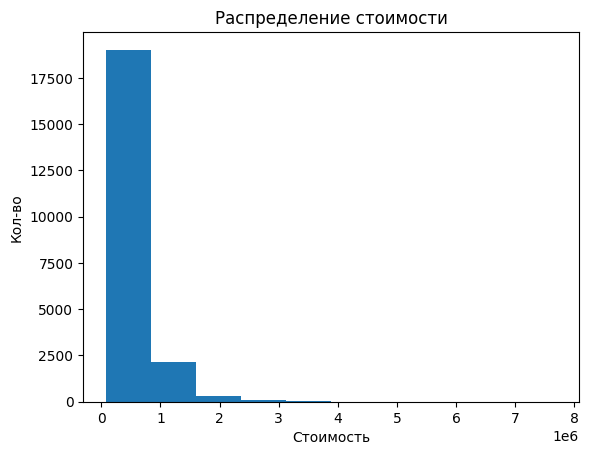

In [7]:
import matplotlib.pyplot as plt
plt.hist(df['price'])
plt.xlabel('Стоимость')
plt.ylabel('Кол-во')
plt.title('Распределение стоимости');

Стоимость абсолютного большинства домов не превышает одного миллиона. Дорогих домов меньше, чем дешевых. Стоимость домов не достигает четырех миллионов 

### 1.3 Изучите распределение квадратуры жилой

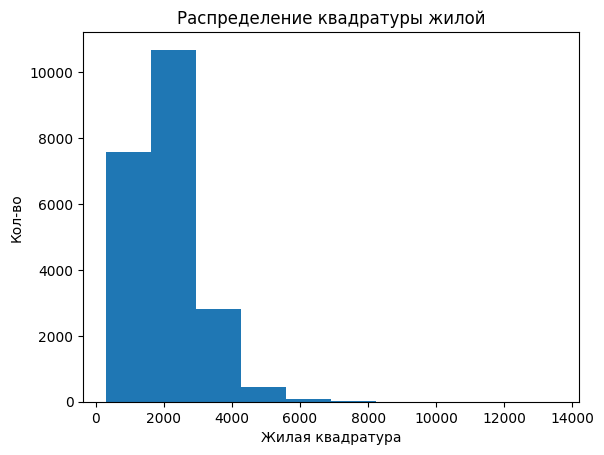

In [9]:
plt.hist(df['sqft_living'])
plt.xlabel('Жилая квадратура')
plt.ylabel('Кол-во')
plt.title('Распределение квадратуры жилой');

Больше всего домов с жилой квадратурой 2000-3000. На втором месте в количественном отношении диапазон квадратуры 0-2000. Домов с квадратурой больше 3000 значительно меньше. Максимальна квадратура не достигает 9000

### 2.1.4 Изучите распределение года постройки

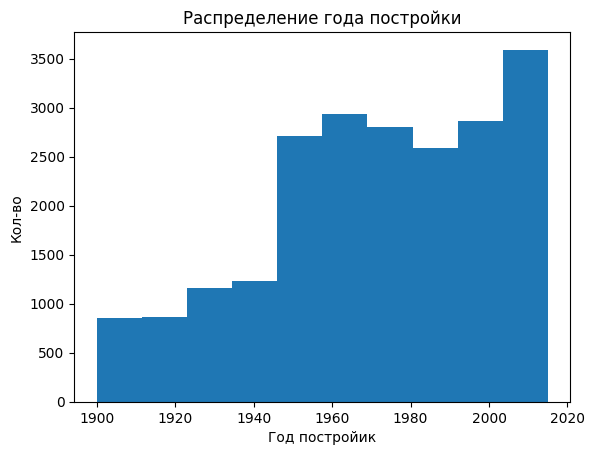

In [13]:
plt.hist(df['yr_built'])
plt.xlabel('Год постройик')
plt.ylabel('Кол-во')
plt.title('Распределение года постройки');

Дома скорее новые. Больше всего домов было построено в 2000-2010 годах. Также много домов было построено в 1960-1970 года. Домов, которые были бы построены раньше 1950 года значительно меньше. Нет домов, которые были бы построены ранее 1900 года

### 2.1 Изучите распределение домов от наличия вида на набережную Постройте график Сделайте выводы

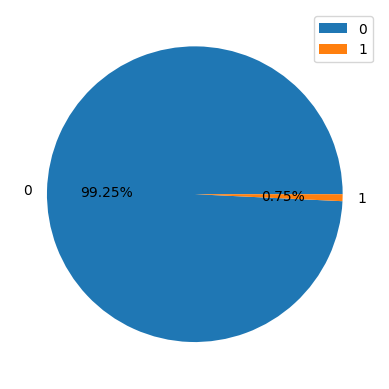

In [15]:

plt.pie(df['waterfront'].value_counts(), labels=df['waterfront'].value_counts().index, autopct='%1.2f%%')
plt.legend(df['waterfront'].value_counts().index)

Менее одного процента домов имеют вид на набережную

### 2.2 Изучите распределение этажей домов

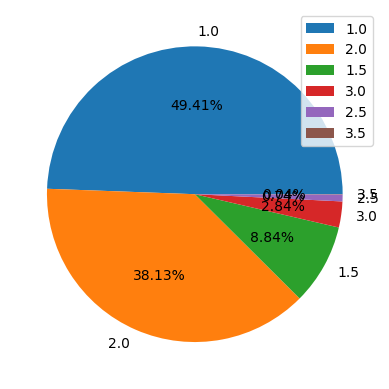

In [16]:
plt.pie(df['floors'].value_counts(), labels=df['floors'].value_counts().index, autopct='%1.2f%%')
plt.legend(df['floors'].value_counts().index)

Чем больше этажей, тем меньше вариантов домов. Более двух третей всех домов имеют не более двух этажей

### 2.2 Изучите распределение состояния домов

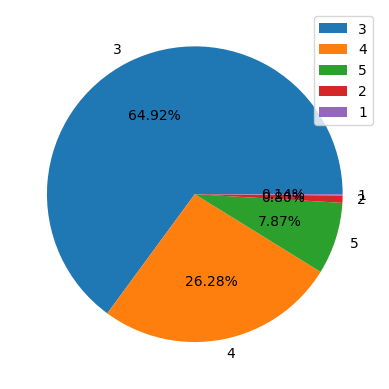

In [17]:
plt.pie(df['condition'].value_counts(), labels=df['condition'].value_counts().index, autopct='%1.2f%%')
plt.legend(df['condition'].value_counts().index)

Большая часть домов имеет состояние 3. Домов с состоянием ниже чем 3 очень мало, меньше всего домов с состоянием 1. Домов с более высоким состоянием, чем три тоже становится тем меньше, чем выше состояние, но плохих домов все равно значительно меньше - можно сказть, что домов с состоянием 5 в семь раз больше, чем домов с состоянием 1

## Условие 3: 3 задача Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

C:\Users\Dimagv\AppData\Local\Temp\ipykernel_18352\1885783791.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<AxesSubplot: >

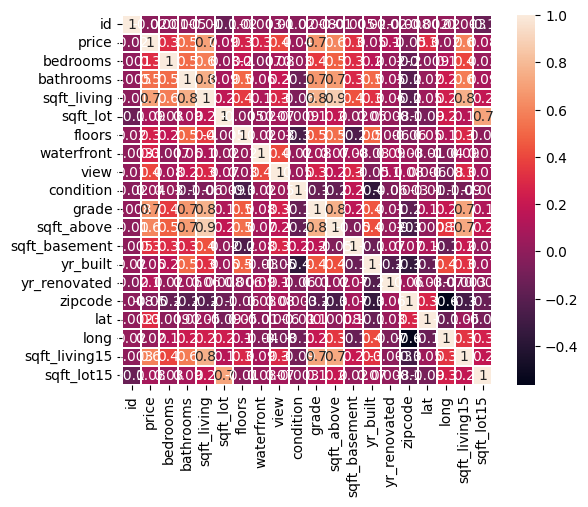

In [26]:
import seaborn as sns

corr_matrix = df.corr()

corr_matrix
sns.heatmap(corr_matrix, annot=True, linewidths=.005, square=True,fmt='.1g')


Ну, на самом деле уже этого достаточно формально для ответа на вопрос задачи. Матрица показывает, что цена коррелирует со спальнями, ваннами, жилым пространстом, общим пространством, количеством этажей, видом, видом на набережную, оценкой, площадями надземной и подземной частей. Попробуем построить графики для некоторых корреляций

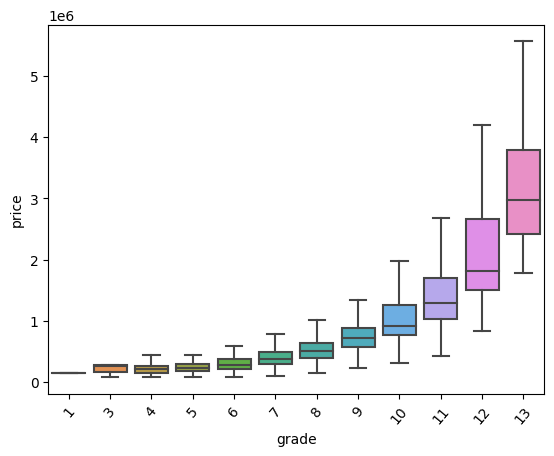

In [36]:
sns.boxplot(y=df['price'], x=df['grade'], showfliers=False)
plt.xticks(rotation=50);

Мы видим, что цена растет с ростом оценки

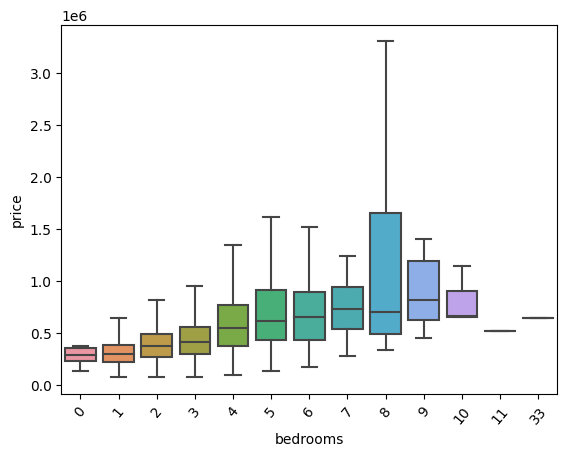

In [37]:
sns.boxplot(y=df['price'], x=df['bedrooms'], showfliers=False)
plt.xticks(rotation=50);

Связь цены с количеством спален не так сильна, как с оценкой, но есть. До 5 спален цена увеличивается за каждую спальню пропорционально, да и на 8 спален приходятся наибольшие цены

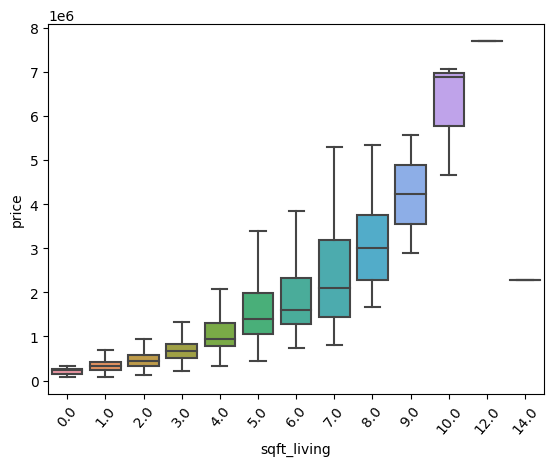

In [39]:
import numpy as np
sns.boxplot(y=df['price'], x=np.round(df['sqft_living']/1000), showfliers=False)
plt.xticks(rotation=50);

Сильная связь цены и жилой площади - чем больше жилая площадь, тем дороже будет дом

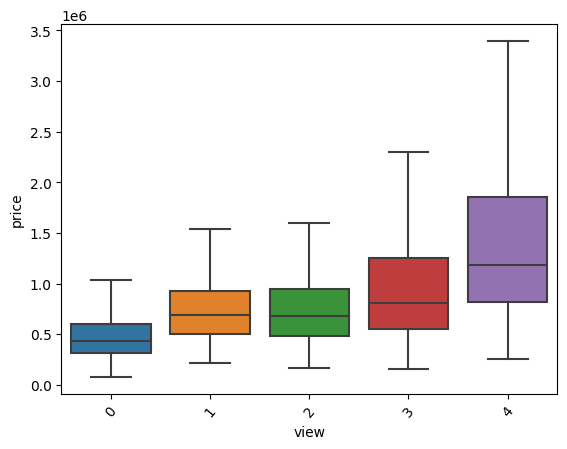

In [40]:
sns.boxplot(y=df['price'], x=df['view'], showfliers=False)
plt.xticks(rotation=50);

Связь не то чтобы очень сильная, однако за действительно хороший вид придется платить больше

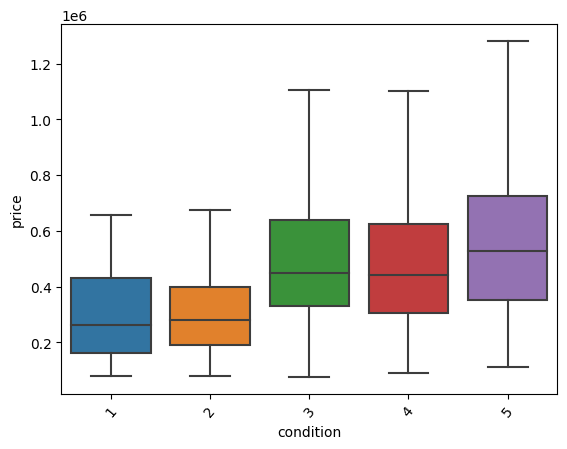

In [41]:
sns.boxplot(y=df['price'], x=df['condition'], showfliers=False)
plt.xticks(rotation=50);

Как и показывает наша матрица корреляций, состояние как-то не очень сильно влияет на цену - если поискать можно найти дома в отличном состоянии, но не дороже худших из худших

### Ну, как-то так - пять графиков. Вывод: матрица корреляций это отличаня штука, а цвета усатых (потенциально) диаграмм очень красивые!